**Implementasi Algoritma KMeans untuk Clustering Data Udemy_Course**





In [1]:
import numpy as np  
import pandas as pd 
import matplotlib.pyplot as plt  
import seaborn as sns 
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('udemy_courses.csv')

In [3]:
df.head(3)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance


In [4]:
df.drop(["course_title", "url", "published_timestamp", "subject","level"], axis = 1, inplace = True)
df.head()

,course_id,is_paid,price,num_subscribers,num_reviews,num_lectures,content_duration
0,1070968,True,200,2147,23,51,1.5
1,1113822,True,75,2792,923,274,39.0
2,1006314,True,45,2174,74,51,2.5
3,1210588,True,95,2451,11,36,3.0
4,1011058,True,200,1276,45,26,2.0


In [5]:
df["is_paid"].value_counts()

True     3368
False     310
Name: is_paid, dtype: int64

In [6]:
dfWithoutLabels = df.iloc[:, 0:8] 
dfWithoutLabels.head()

,course_id,is_paid,price,num_subscribers,num_reviews,num_lectures,content_duration
0,1070968,True,200,2147,23,51,1.5
1,1113822,True,75,2792,923,274,39.0
2,1006314,True,45,2174,74,51,2.5
3,1210588,True,95,2451,11,36,3.0
4,1011058,True,200,1276,45,26,2.0


In [7]:
dfWithoutLabels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   course_id         3678 non-null   int64  
 1   is_paid           3678 non-null   bool   
 2   price             3678 non-null   int64  
 3   num_subscribers   3678 non-null   int64  
 4   num_reviews       3678 non-null   int64  
 5   num_lectures      3678 non-null   int64  
 6   content_duration  3678 non-null   float64
dtypes: bool(1), float64(1), int64(5)
memory usage: 176.1 KB


In [8]:
df_km = df.iloc[: 0:8]

In [9]:
from sklearn.metrics import davies_bouldin_score
results = {}
for i in range(2,11): 
  kmeans = KMeans(n_clusters=i, random_state=30) 
  labels = kmeans.fit_predict(df) 
  db_index =davies_bouldin_score(df, labels)
  results.update({i: db_index})

In [10]:
results

{2: 0.5411178115720993,
 3: 0.5123071838366995,
 4: 0.511558574036896,
 5: 0.5112845412791197,
 6: 0.4904364092280429,
 7: 0.5073919564115438,
 8: 0.508223425919566,
 9: 0.5121142388749582,
 10: 0.5095921229331661}

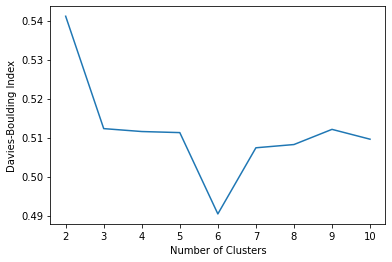

In [11]:
plt.plot(list(results.keys()), list(results.values()))
plt.xlabel("Number of Clusters")
plt.ylabel("Davies-Boulding Index")
plt.show()

In [12]:
kmeans =  KMeans(n_clusters=3, random_state=30)
kmeans.fit(df)
pred = kmeans.predict(df)

In [13]:
db_index = davies_bouldin_score(df, pred)
print(db_index)

0.5123071838366995


In [14]:
df['Clusters'] = pred 
df

,course_id,is_paid,price,num_subscribers,num_reviews,num_lectures,content_duration,Clusters
0,1070968,True,200,2147,23,51,1.5,1
1,1113822,True,75,2792,923,274,39.0,1
2,1006314,True,45,2174,74,51,2.5,1
3,1210588,True,95,2451,11,36,3.0,1
4,1011058,True,200,1276,45,26,2.0,1
...,...,...,...,...,...,...,...,...
3673,775618,True,100,1040,14,21,2.0,0
3674,1088178,True,25,306,3,42,3.5,1
3675,635248,True,40,513,169,48,3.5,0
3676,905096,True,50,300,31,38,3.0,1


In [15]:
df.to_csv('Hasil Clustering.csv', index=False)

In [ ]:
data_hasil = pd.read_csv('Hasil Clustering.csv')

In [ ]:
print(data_hasil)

      course_id  is_paid  price  ...  num_lectures  content_duration  Clusters
0       1070968     True    200  ...            51               1.5         1
1       1113822     True     75  ...           274              39.0         1
2       1006314     True     45  ...            51               2.5         1
3       1210588     True     95  ...            36               3.0         1
4       1011058     True    200  ...            26               2.0         1
...         ...      ...    ...  ...           ...               ...       ...
3673     775618     True    100  ...            21               2.0         0
3674    1088178     True     25  ...            42               3.5         1
3675     635248     True     40  ...            48               3.5         0
3676     905096     True     50  ...            38               3.0         1
3677     297602     True     45  ...            20               2.0         2

[3678 rows x 8 columns]


In [ ]:
dfWithoutLabels = df.loc[:,['num_lectures', 'num_reviews']]
kmeans = KMeans(n_clusters=2)
clusters = kmeans.fit_predict(dfWithoutLabels)
dfWithoutLabels["type"] = clusters
dfWithoutLabels["type"].unique()

array([0, 1], dtype=int32)

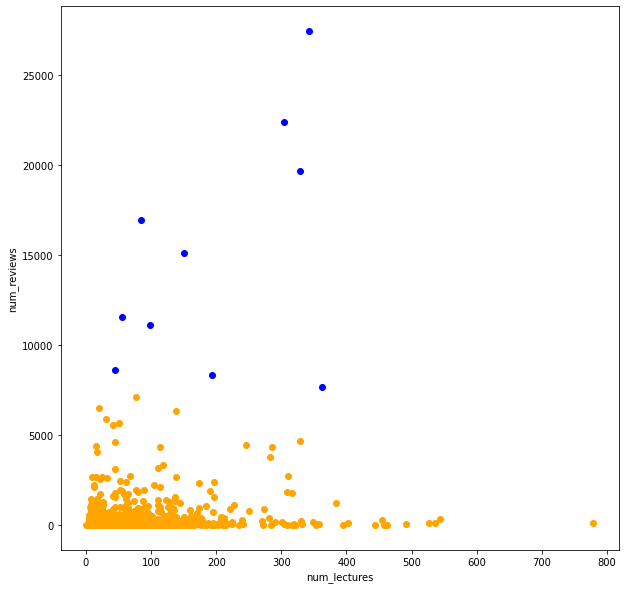

In [ ]:
plt.figure(figsize= (10, 10))
plt.scatter(dfWithoutLabels["num_lectures"][dfWithoutLabels["type"] == 0], dfWithoutLabels["num_reviews"][dfWithoutLabels["type"] == 0], color = "orange")
plt.scatter(dfWithoutLabels["num_lectures"][dfWithoutLabels["type"] == 1], dfWithoutLabels["num_reviews"][dfWithoutLabels["type"] == 1], color = "blue")
plt.xlabel('num_lectures')
plt.ylabel('num_reviews')
plt.show()

**Kesimpulan :** 
Dari clustering KMeans diatas, mendapatkan nilai dbi yaitu 0.51 dan dibandingkan dengan metode AHC mendapatkan nilai dbi 0.53 Artinya, Pengclusteran yg bagus adalah menggunakan metode KMeans. karena nilai DBI yg bagus adalah nilai yg mendekati 0 tp bukan - (mines)